In [89]:
import pandas as pd
from gspread_pandas import Spread, Client

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

from src.common import eprint
from src.drug import get_df_from_spread_and_sheet
from src.drug import draw_scatter_value_x_period
from src.drug import transform_df
from src.drug import print_df_individual

dir_item = '/home/jake/Documents/News_Item/'
dir_proj = dir_item + 'Drug/'
dir_tableau = dir_proj + 'tableau_data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load

In [2]:
spread = Spread('danbi2990', 'Drug_Agg')

In [3]:
eprint(spread.sheets)

0 <Worksheet '1_구속(누적)' id:523322038>
1 <Worksheet '2_유형(누적)' id:260921837>
2 <Worksheet '3_성별(누적)' id:1128951394>
3 <Worksheet '4_직업(누적)' id:651796049>
4 <Worksheet '5_나이(누적)' id:876335744>
5 <Worksheet '6_지역(누적)' id:1218276401>
6 <Worksheet '7_마약종류(누적)' id:266747788>


In [4]:
dfs = [transform_df(get_df_from_spread_and_sheet(spread, i)) for i in range(len(spread.sheets))]
print(len(dfs))

7


# 향정 사범 추이

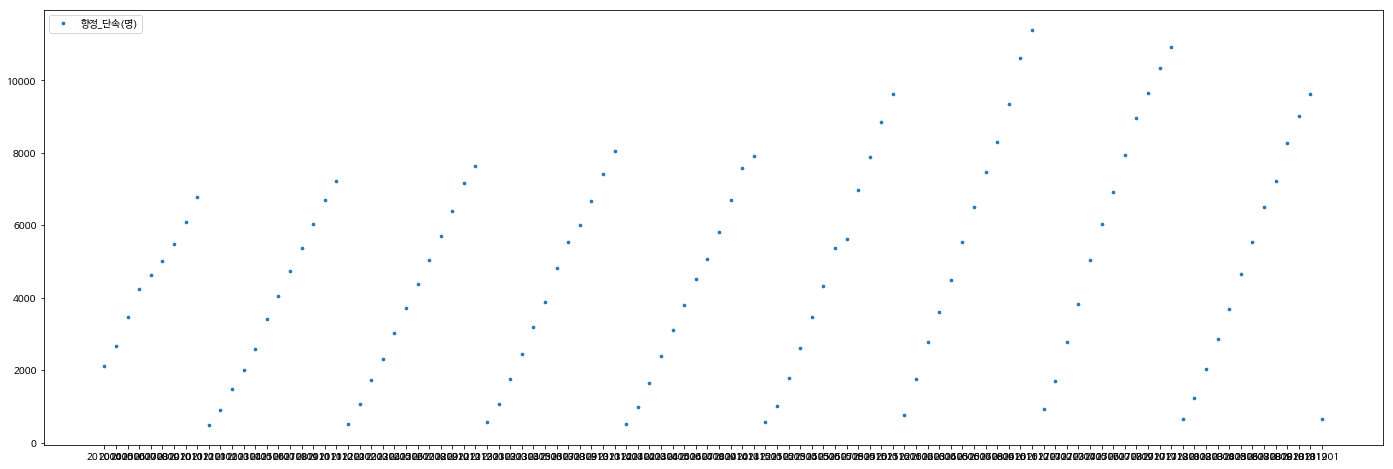

In [5]:
draw_scatter_value_x_period(dfs[0].sort_values('기간', ascending=True), '기간', ['향정_단속(명)'])

# Export: 향정 추이

In [92]:
tmp = dfs[0].loc[::, ['기간', '향정_단속(명)']].sort_values('기간', ascending=False)
# tmp.to_csv(dir_tableau + 'psycho_trend.tsv', sep='\t', index=False)

# 향정 소지 비율 증가

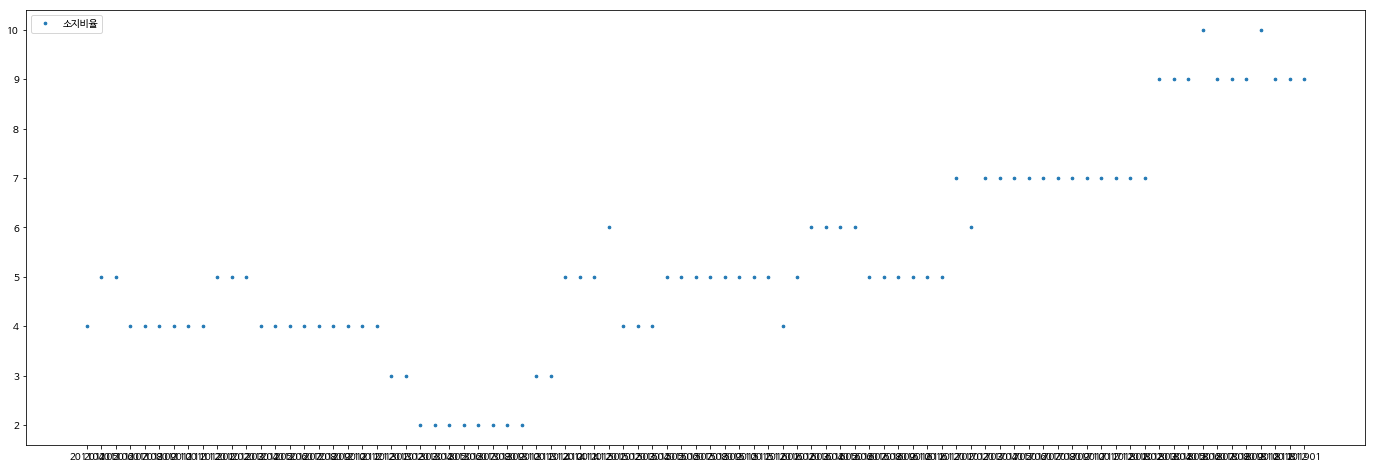

In [66]:
tmp = '소지'
tmp_rate = tmp + '비율'
dfs[1][tmp_rate] = dfs[1][tmp].astype(float) / dfs[1]['합계'].astype(float) * 100
draw_scatter_value_x_period(dfs[1].loc[dfs[1]['종류']=='향정'].sort_values('기간', ascending=True), '기간', [tmp_rate])

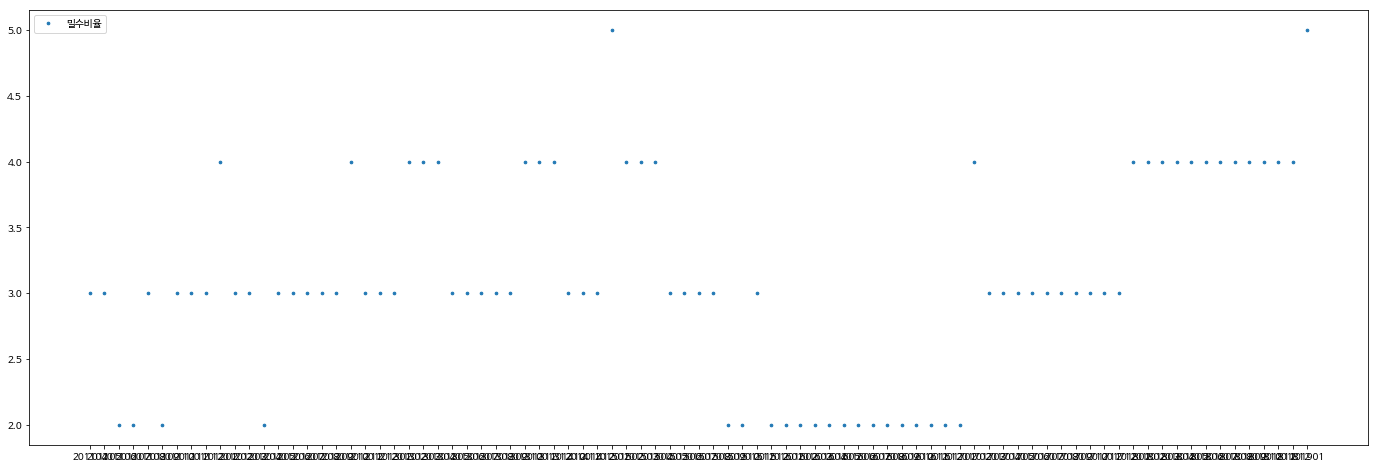

In [65]:
tmp = '밀수'
tmp_rate = tmp + '비율'
dfs[1][tmp_rate] = dfs[1][tmp].astype(float) / dfs[1]['합계'].astype(float) * 100
draw_scatter_value_x_period(dfs[1].loc[dfs[1]['종류']=='향정'].sort_values('기간', ascending=True), '기간', [tmp_rate])

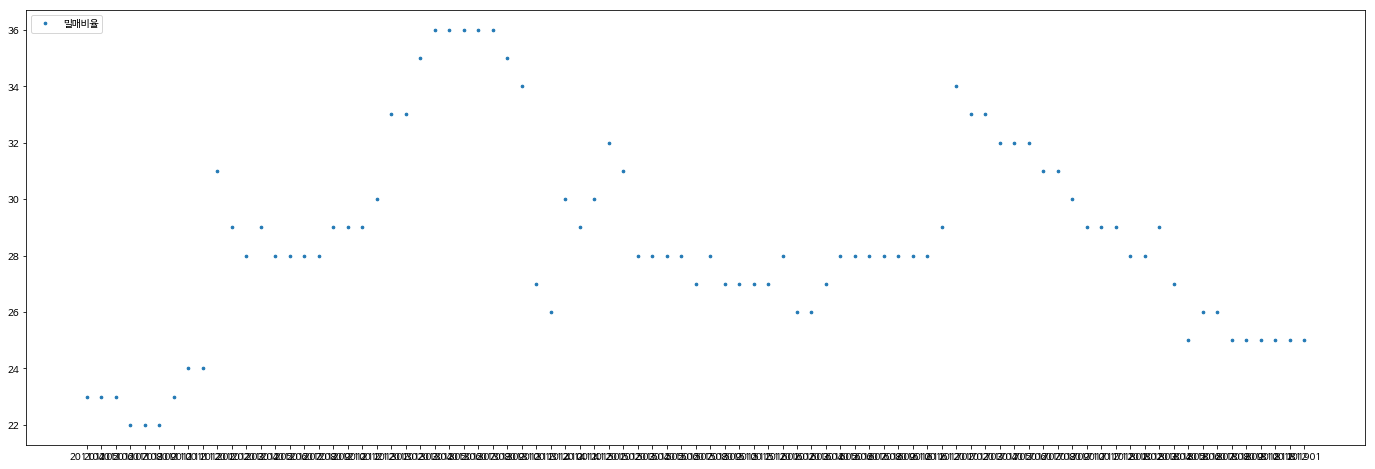

In [64]:
tmp = '밀매'
tmp_rate = tmp + '비율'
dfs[1][tmp_rate] = dfs[1][tmp].astype(float) / dfs[1]['합계'].astype(float) * 100
draw_scatter_value_x_period(dfs[1].loc[dfs[1]['종류']=='향정'].sort_values('기간', ascending=True), '기간', [tmp_rate])

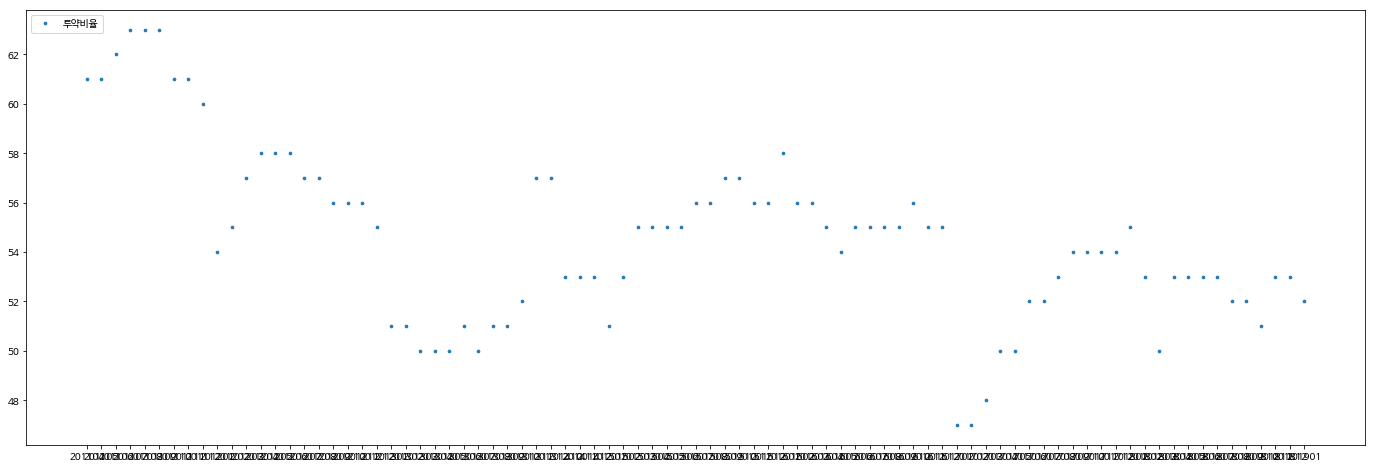

In [69]:
tmp = '투약'
tmp_rate = tmp + '비율'
dfs[1][tmp_rate] = dfs[1][tmp].astype(float) / dfs[1]['합계'].astype(float) * 100
draw_scatter_value_x_period(dfs[1].loc[dfs[1]['종류']=='향정'].sort_values('기간', ascending=True), '기간', [tmp_rate])

# Export: 유형 추이

In [95]:
tmp = dfs[1].loc[(dfs[1]['종류']=='향정'), ['기간', '소지비율', '밀수비율', '밀매비율', '투약비율']].sort_values('기간', ascending=False)
# tmp.to_csv(dir_tableau + 'type_trend.tsv', sep='\t', index=False)

# 향정 성별 비율 추이

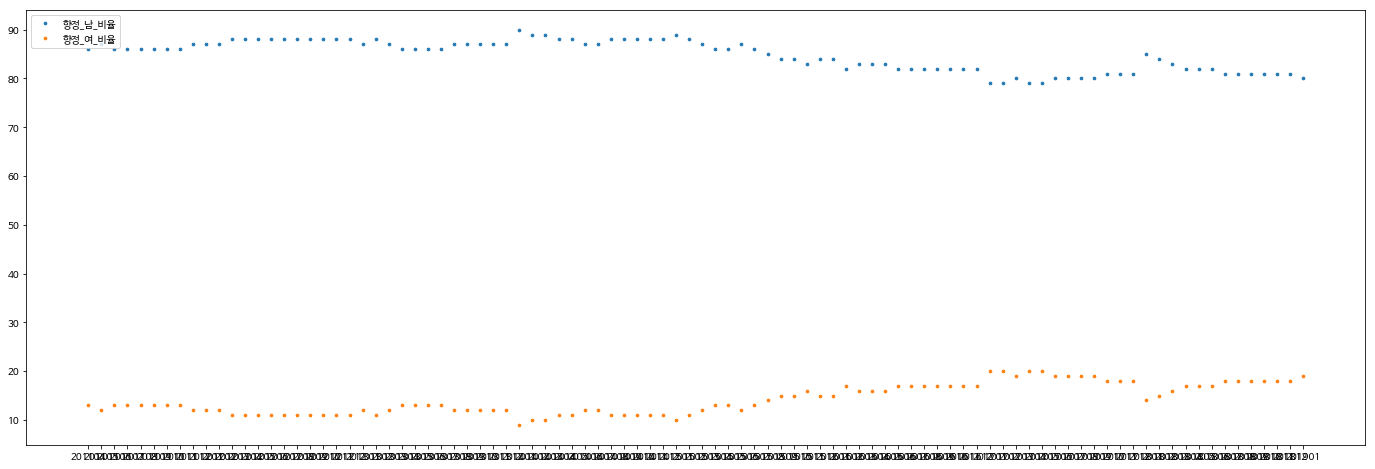

In [9]:
dfs[2]['향정합계'] = dfs[2]['향정_남'].astype(float) + dfs[2]['향정_여'].astype(float)
dfs[2]['향정_남_비율'] = dfs[2]['향정_남'].astype(float) / dfs[2]['향정합계'] * 100
dfs[2]['향정_여_비율'] = dfs[2]['향정_여'].astype(float) / dfs[2]['향정합계'] * 100

draw_scatter_value_x_period(dfs[2].sort_values('기간', ascending=True), '기간', ['향정_남_비율', '향정_여_비율'])

# Export: 성별 추이

In [98]:
tmp = dfs[2].loc[::, ['기간', '향정_남_비율', '향정_여_비율']].sort_values('기간', ascending=False)
# tmp.to_csv(dir_tableau + 'gender.tsv', sep='\t', index=False)

In [63]:
dfs[2].head(20)

,대마_남,대마_여,마약_남,마약_여,향정_남,향정_여,합계_남,합계_여,기간,합계,Validation1,Validation2,향정합계,향정_남_비율,향정_여_비율
0,96,12,32,10,528,130,656,152,201901,808,1,1,658.0,80.243161,19.756839
1,1367,166,715,752,7812,1801,9894,2719,201812,12613,1,1,9613.0,81.264954,18.735046
2,1283,154,696,743,7337,1670,9316,2567,201811,11883,1,1,9007.0,81.458865,18.541135
3,1186,149,674,733,6729,1528,8589,2410,201810,10999,1,1,8257.0,81.494490,18.505510
4,1070,125,655,720,5889,1331,7614,2176,201809,9790,1,1,7220.0,81.565097,18.434903
5,957,102,612,702,5296,1196,6865,2000,201808,8865,1,1,6492.0,81.577326,18.422674
6,809,90,481,529,4506,1019,5796,1638,201807,7434,1,1,5525.0,81.556561,18.443439
7,696,68,287,225,3834,831,4817,1124,201806,5941,1,1,4665.0,82.186495,17.813505
8,560,48,138,55,3032,661,3730,764,201805,4494,1,1,3693.0,82.101273,17.898727
9,431,35,114,30,2370,490,2915,555,201804,3470,1,1,2860.0,82.867133,17.132867


# 향정 사용 비율이 가장 높은 직군?

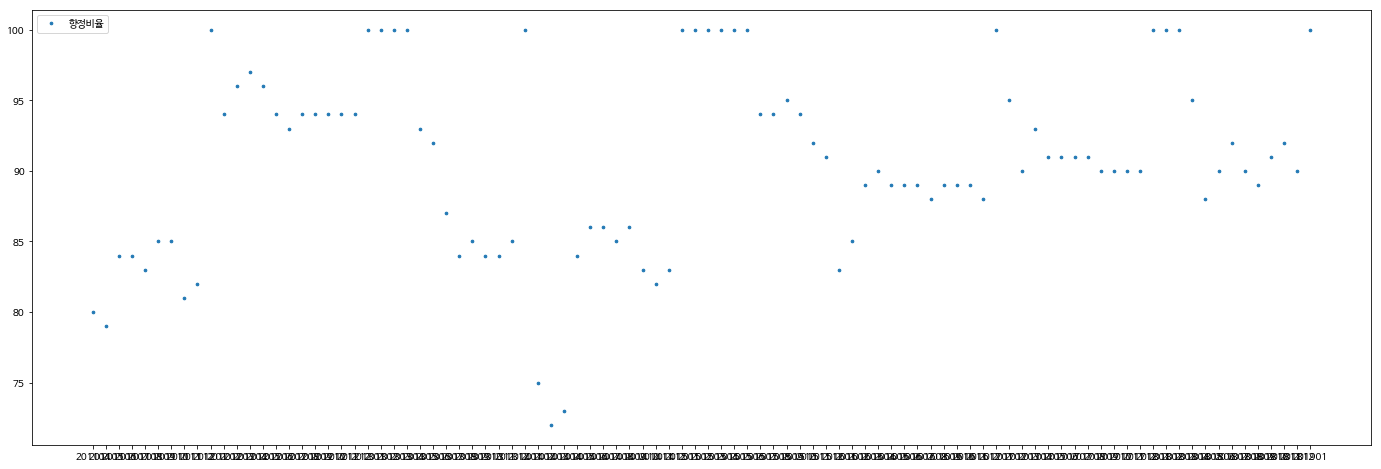

In [28]:
dfs[3]['향정비율'] = dfs[3]['향정'].astype(float) / dfs[3]['합계'].astype(float) * 100

draw_scatter_value_x_period(dfs[3].loc[dfs[3]['종류']=='유흥업'].sort_values('기간', ascending=True), '기간', ['향정비율'])

In [29]:
dfs[3].sort_values(['기간', '향정비율'], ascending=[False, False]).head(50)

,종류,대마,마약,향정,합계,기간,Validation,향정비율
4,유흥업,0,0,4,4,201901,1,100.000000
10,공업,0,0,7,7,201901,1,100.000000
13,운송업,0,0,5,5,201901,1,100.000000
14,가사,0,0,5,5,201901,1,100.000000
16,어업,0,0,3,3,201901,1,100.000000
8,노동,0,1,21,22,201901,1,95.454545
18,직업미상,7,6,110,123,201901,1,89.430894
3,도소매업,1,0,8,9,201901,1,88.888889
1,무직,29,8,192,229,201901,1,83.842795
5,서비스업,0,2,10,12,201901,1,83.333333


In [35]:
tmp_3 = dfs[3].pivot(columns='종류', index='기간', values='향정비율').fillna(0).reset_index().sort_values('기간', ascending=False)
tmp_3

종류,기간,가사,건설,공업,금융/증권,기타,노동,농업,도소매업,무직,부동산업,서비스업,어업,예술,운송업,유흥업,의료,직업미상,학생,합계,회사원
93,201901,100.000000,75.000000,100.000000,0.000000,78.947368,95.454545,20.000000,88.888889,83.842795,50.000000,83.333333,100.000000,0.000000,100.000000,100.000000,69.230769,89.430894,40.000000,81.435644,70.000000
92,201812,59.523810,87.500000,78.571429,80.952381,77.519693,82.309582,8.685446,80.952381,79.829470,78.125000,81.714286,79.310345,37.209302,78.571429,90.384615,77.551020,82.489146,59.349593,76.215016,75.468165
91,201811,57.232704,90.277778,79.200000,78.947368,77.288208,81.395349,7.398568,77.966102,79.533163,79.310345,80.864198,77.777778,36.363636,77.528090,92.000000,76.190476,82.554517,58.771930,75.797358,75.551102
90,201810,55.555556,90.769231,78.761062,77.777778,76.543493,82.028986,7.371007,73.214286,78.858546,77.777778,81.632653,77.777778,37.209302,78.750000,91.397849,71.014493,82.231760,60.550459,75.070461,75.536481
89,201809,52.142857,91.935484,76.923077,73.333333,75.719098,82.847896,6.281407,74.000000,77.437134,75.000000,81.060606,77.272727,36.585366,77.142857,89.333333,65.151515,81.463415,60.606061,73.748723,74.494949
88,201808,50.000000,91.228070,73.333333,66.666667,75.661827,85.000000,5.305040,76.086957,76.452716,72.727273,80.000000,70.588235,28.571429,79.365079,90.163934,65.000000,81.917211,59.574468,73.231810,74.492754
87,201807,51.401869,89.795918,70.588235,77.777778,76.193701,87.553648,6.093190,72.727273,77.491103,77.777778,78.899083,69.230769,29.411765,80.769231,92.156863,69.230769,82.625483,60.000000,74.320689,74.444444
86,201806,66.666667,92.682927,70.833333,87.500000,78.660750,89.637306,10.852713,80.555556,82.561464,81.250000,78.048780,75.000000,31.250000,80.851064,90.697674,72.727273,82.656250,59.154930,78.522134,76.076555
85,201805,89.189189,91.176471,70.731707,83.333333,80.390144,92.715232,42.307692,77.272727,87.052551,100.000000,86.274510,80.000000,32.142857,88.888889,88.571429,74.193548,80.806142,56.363636,82.176235,78.321678
84,201804,88.888889,91.304348,68.571429,100.000000,80.522876,91.596639,57.142857,73.684211,87.210473,100.000000,88.636364,75.000000,46.666667,88.000000,95.833333,69.230769,81.055156,48.717949,82.420749,78.378378


In [82]:
# tmp_3.loc[tmp_3['기간']=='201812'].T.sort_values(ascending=False)
cols = tmp_3.columns.tolist()
cols.remove('기간')
tmp_3.loc[tmp_3['기간']=='201812', cols].T.sort_values(92, ascending=False)
# tmp_3.loc[tmp_3['기간']=='201812'].T

,92
종류,
유흥업,90.384615
건설,87.500000
직업미상,82.489146
노동,82.309582
서비스업,81.714286
금융/증권,80.952381
도소매업,80.952381
무직,79.829470
어업,79.310345


In [46]:
'''
유흥업이 평균적으로 제일 많이 사용한다.
'''
tmp_3.mean().sort_values(ascending=False)

종류
기간       inf      
유흥업      90.905791
도소매업     88.892165
직업미상     85.824364
무직       85.574464
노동       83.271077
금융/증권    83.220128
건설       83.194981
기타       82.907379
부동산업     82.172848
합계       81.701822
회사원      80.752675
서비스업     79.782266
의료       78.336727
운송업      77.425795
공업       71.964387
어업       71.156765
가사       66.984256
학생       60.793310
예술       34.177026
농업       32.121896
dtype: float64

# Export: 직업

In [113]:
tmp = tmp_3.mean().to_frame()
tmp2 = tmp.drop(index='기간')
tmp2 = tmp2.rename(columns={0: '평균비율'}).reset_index().sort_values('평균비율', ascending=False)
# tmp2.to_csv(dir_tableau + 'job.tsv', sep='\t', index=False)

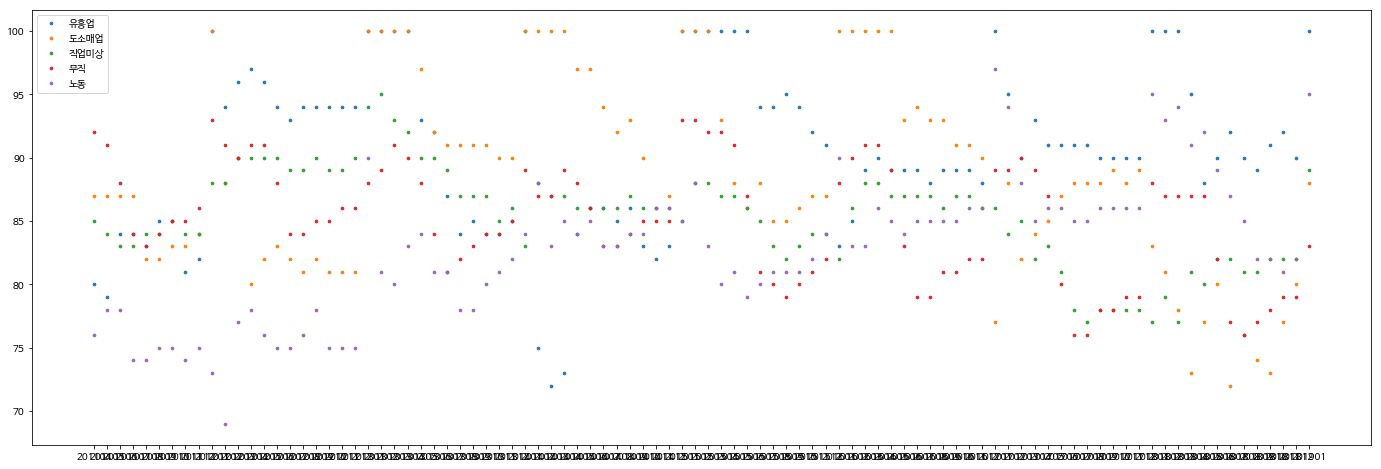

In [44]:
cols = tmp_3.mean().sort_values(ascending=False).index.tolist()[1:6]
draw_scatter_value_x_period(tmp_3.sort_values('기간', ascending=True), '기간', cols)

# 향정 청년사범 증가?

In [47]:
dfs[4].head()

,종류,15 미만,15-18,19,20-29,30-39,40-49,50-59,60 이상,미상,합계,기간,Validation
0,합계,1,5,6,153,217,200,162,35,29,808,201901,1
1,대마,1,2,0,41,30,12,18,3,1,108,201901,1
2,마약,0,1,0,1,11,8,10,5,6,42,201901,1
3,향정,0,2,6,111,176,180,134,27,22,658,201901,1
4,합계,1,70,72,2118,2996,3305,2352,1457,242,12613,201812,1


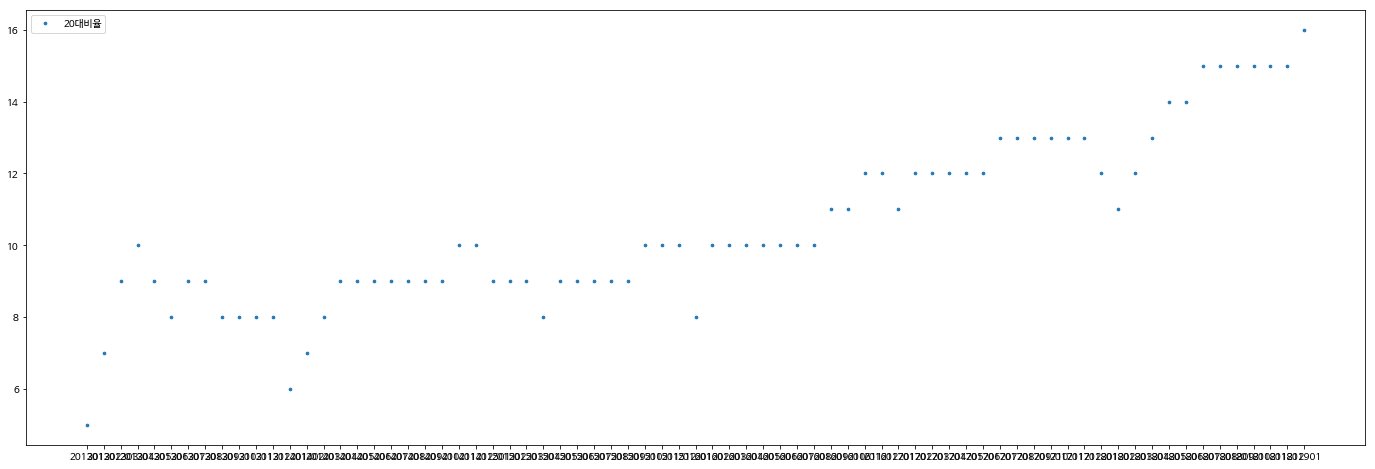

In [48]:
dfs[4]['20대비율'] = dfs[4]['20-29'].astype(float) / dfs[4]['합계'].astype(float) * 100

draw_scatter_value_x_period(dfs[4].loc[dfs[4]['종류']=='향정'].sort_values('기간', ascending=True), '기간', ['20대비율'])

# Export: 청년

In [116]:
tmp = dfs[4].loc[dfs[4]['종류']=='향정', ['기간', '20대비율']].sort_values('기간', ascending=False)
# tmp.to_csv(dir_tableau + 'young.tsv', sep='\t', index=False)

In [85]:
dfs[4].loc[dfs[4]['종류']=='향정'].sort_values('기간', ascending=False).head(30)

,종류,15 미만,15-18,19,20-29,30-39,40-49,50-59,60 이상,미상,합계,기간,Validation,20대비율
3,향정,0,2,6,111,176,180,134,27,22,658,201901,1,16.869301
7,향정,1,54,50,1522,2522,2979,1924,389,172,9613,201812,1,15.832727
11,향정,1,52,41,1420,2376,2803,1783,368,163,9007,201811,1,15.765516
15,향정,1,51,37,1309,2191,2561,1635,334,138,8257,201810,1,15.853215
19,향정,1,39,29,1136,1867,2292,1444,292,120,7220,201809,1,15.734072
23,향정,1,36,27,1000,1655,2087,1314,267,105,6492,201808,1,15.403574
27,향정,1,32,26,840,1375,1779,1155,224,93,5525,201807,1,15.203620
31,향정,1,26,25,696,1166,1507,985,185,74,4665,201806,1,14.919614
35,향정,1,15,15,523,900,1192,828,153,66,3693,201805,1,14.161928
39,향정,1,13,5,372,665,951,675,119,59,2860,201804,1,13.006993


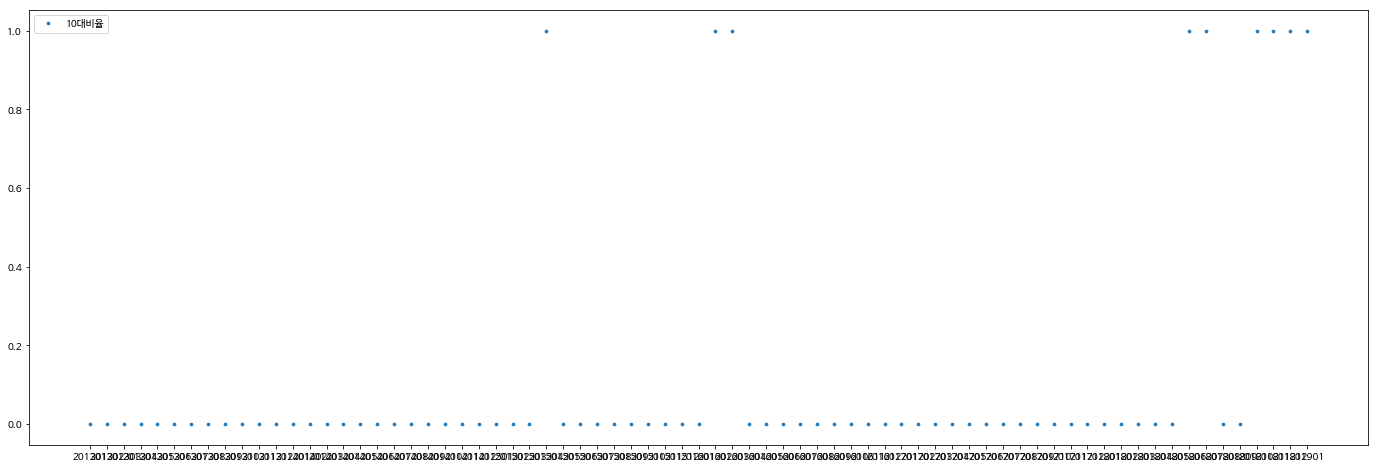

In [122]:
dfs[4]['15-19'] = (dfs[4]['15-18'].astype(float) + dfs[4]['19'].astype(float))
dfs[4]['10대비율'] = dfs[4]['15-19'].astype(float) / dfs[4]['합계'].astype(float) * 100

# dfs[4].loc[dfs[4]['종류']=='향정'].sort_values('기간', ascending=False)
draw_scatter_value_x_period(dfs[4].loc[dfs[4]['종류']=='향정'].sort_values('기간', ascending=True), '기간', ['10대비율'])

# Export: 10대

In [124]:
tmp = dfs[4].loc[dfs[4]['종류']=='향정', ['기간', '10대비율']].sort_values('기간', ascending=False)
# tmp.to_csv(dir_tableau + 'teen.tsv', sep='\t', index=False)

# 향정 사범 비율 높은 지역?

In [49]:
dfs[5].head()

,지역,대마,마약,향정,합계,기간,Validation
0,합계,108,42,658,808,201901,1
1,서울,38,3,125,166,201901,1
2,인천경기,29,11,204,244,201901,1
3,부산,3,2,48,53,201901,1
4,울산경남,8,2,59,69,201901,1


In [50]:
dfs[5]['향정비율'] = dfs[5]['향정'].astype(float) / dfs[5]['합계'].astype(float) * 100
dfs[5].head()

,지역,대마,마약,향정,합계,기간,Validation,향정비율
0,합계,108,42,658,808,201901,1,81.435644
1,서울,38,3,125,166,201901,1,75.301205
2,인천경기,29,11,204,244,201901,1,83.606557
3,부산,3,2,48,53,201901,1,90.566038
4,울산경남,8,2,59,69,201901,1,85.507246


In [52]:
tmp_5 = dfs[5].pivot(columns='지역', index='기간', values='향정비율').sort_values('기간', ascending=False)
tmp_5.head(10)

지역,강원,광주전남,대구경북,대전충남,부산,불상,서울,외국,울산경남,인천경기,전북,제주,충북,합계
기간,,,,,,,,,,,,,,
201901,40.000000,71.428571,90.384615,82.352941,90.566038,88.596491,75.301205,83.333333,85.507246,83.606557,87.500000,33.333333,60.000000,81.435644
201812,37.465565,63.938619,72.262027,69.507324,86.488889,86.015164,79.604034,73.584906,77.722278,76.572238,79.285714,82.142857,54.419890,76.215016
201811,36.000000,62.326870,71.489818,67.902996,86.287313,86.071429,79.665072,75.000000,77.011494,76.284585,79.411765,81.818182,53.868195,75.797358
201810,34.421365,60.360360,70.057803,67.133956,85.898709,86.067194,79.479393,76.470588,76.048565,75.699704,77.235772,78.723404,52.694611,75.070461
201809,29.581994,57.823129,67.447917,64.070796,86.681465,86.477273,78.394750,77.083333,75.295508,74.614820,75.652174,79.069767,49.358974,73.748723
201808,28.378378,56.923077,66.764275,62.075848,87.053021,86.895674,77.901786,78.260870,75.226978,74.274194,75.000000,80.487805,46.896552,73.231810
201807,46.478873,58.411215,63.859649,60.705882,86.781609,85.933148,77.640156,82.926829,75.150602,75.289575,74.074074,82.352941,48.971193,74.320689
201806,67.777778,65.517241,71.496437,70.033670,86.277873,86.579378,77.743902,80.555556,79.924953,79.950950,74.603175,83.870968,61.006289,78.522134
201805,68.115942,78.151261,84.982935,76.525822,86.491935,86.023622,77.534791,80.645161,87.405542,81.728395,85.000000,86.363636,90.588235,82.176235


In [62]:
tmp_5.mean().sort_values(ascending=False)

지역
부산      88.591973
불상      85.098430
제주      84.824641
울산경남    84.092427
대구경북    81.495812
전북      79.900562
합계      79.049541
인천경기    78.206578
서울      77.834344
대전충남    70.294024
외국      67.586441
충북      64.946857
광주전남    63.412647
강원      58.821038
dtype: float64